<a href="https://colab.research.google.com/github/Itsbeulah/Itsbeulah/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [3]:
!kaggle datasets download -d faysalmiah1721758/potato-dataset

Dataset URL: https://www.kaggle.com/datasets/faysalmiah1721758/potato-dataset
License(s): CC0-1.0
 87% 33.0M/37.8M [00:00<00:00, 106MB/s] 
100% 37.8M/37.8M [00:00<00:00, 97.1MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/potato-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [5]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow import keras

In [6]:
DATADIR = '/content/PotatoDisease'
Categories = ['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']


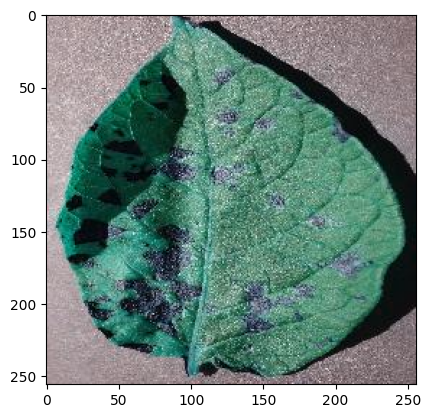

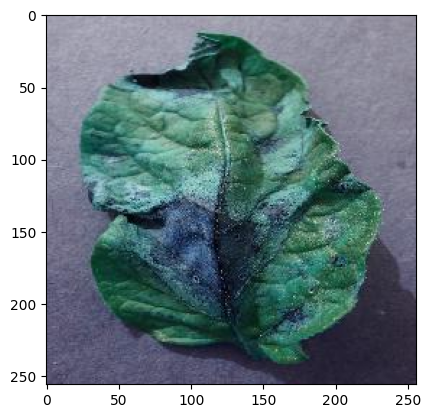

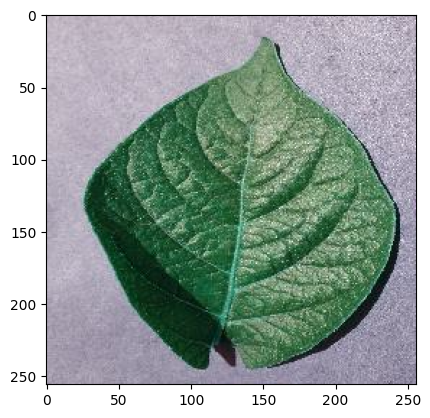

In [7]:
for category in Categories:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img))
    plt.imshow(img_array)
    plt.show()
    break
    break

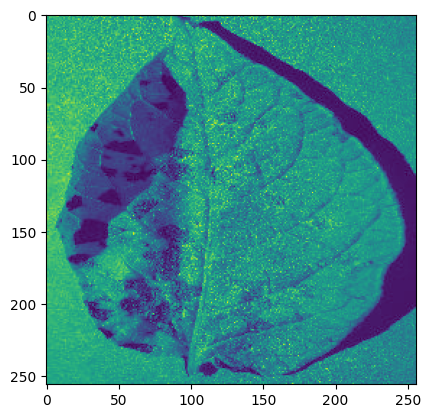

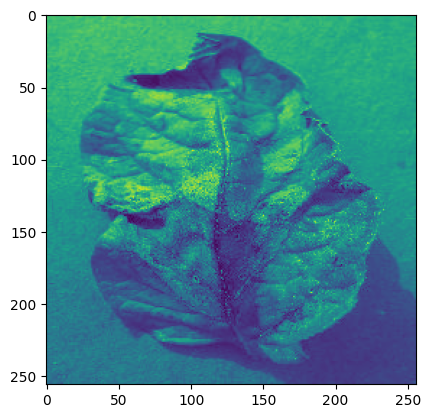

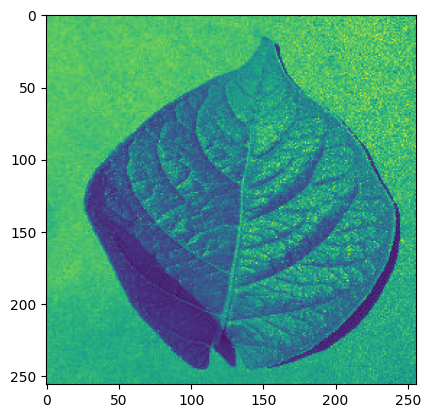

In [8]:
for category in Categories:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array)
    plt.show()
    break
    break

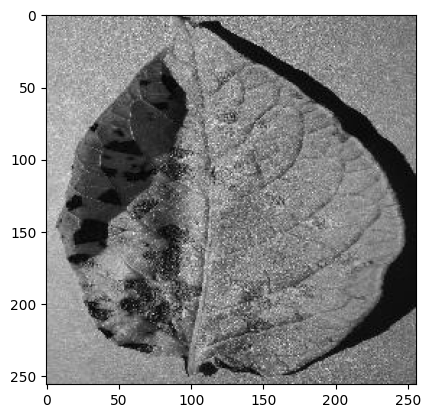

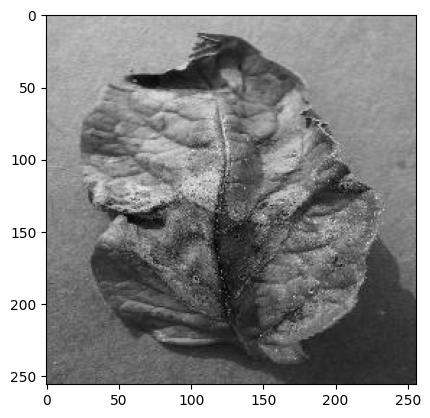

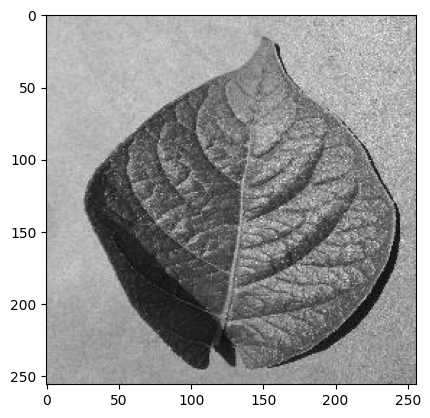

In [9]:
for category in Categories:
  path = os.path.join(DATADIR, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
    plt.imshow(img_array, cmap='gray')
    plt.show()
    break
    break

array([[183, 178, 177, ..., 178, 156, 150],
       [180, 181, 182, ..., 178, 149, 151],
       [176, 183, 187, ..., 183, 184, 171],
       ...,
       [155, 165, 174, ..., 136, 150, 166],
       [173, 163, 168, ..., 138, 151, 143],
       [171, 145, 152, ..., 152, 163, 147]], dtype=uint8)
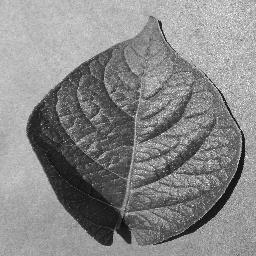

In [10]:
img_array

In [11]:
img_array.shape

(256, 256)

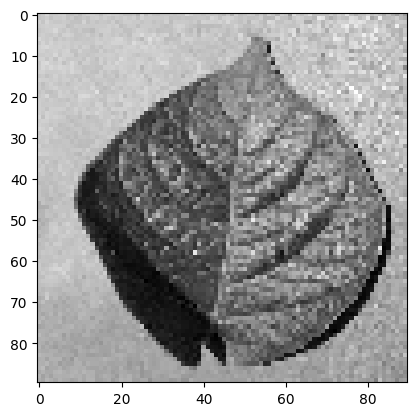

In [15]:
IMG_SIZE = 90
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [18]:
#creating training data
training_data = []
def create_training_data():
  for category in Categories:
    path = os.path.join(DATADIR, category) #constructing the path
    class_num = Categories.index(category)
    # The for loop for images should be inside the for loop for categories
    # to ensure that images from all categories are processed
    for img in os.listdir(path):
      try:
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        training_data.append([new_array, class_num])
      except Exception as e: # Fixed indentation for the except block
        pass

In [19]:
 create_training_data()

In [20]:
len(training_data)

2152

In [21]:
import random
random.shuffle(training_data)

In [22]:
X = []
y = []

for features, label in training_data:
  X.append(features)
  y.append(label)

In [23]:
type(X), type(y)

(list, list)

In [24]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
y = np.array(y)

In [25]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [26]:
X

array([[[[165],
         [161],
         [157],
         ...,
         [139],
         [142],
         [142]],

        [[162],
         [161],
         [167],
         ...,
         [149],
         [141],
         [135]],

        [[159],
         [157],
         [159],
         ...,
         [138],
         [157],
         [156]],

        ...,

        [[192],
         [199],
         [195],
         ...,
         [162],
         [161],
         [165]],

        [[194],
         [189],
         [193],
         ...,
         [155],
         [158],
         [155]],

        [[191],
         [190],
         [195],
         ...,
         [162],
         [154],
         [164]]],


       [[[177],
         [184],
         [181],
         ...,
         [170],
         [157],
         [153]],

        [[184],
         [180],
         [181],
         ...,
         [162],
         [166],
         [160]],

        [[181],
         [175],
         [174],
         ...,
         [165],
         [

In [27]:
X = X/255

In [28]:
X

array([[[[0.64705882],
         [0.63137255],
         [0.61568627],
         ...,
         [0.54509804],
         [0.55686275],
         [0.55686275]],

        [[0.63529412],
         [0.63137255],
         [0.65490196],
         ...,
         [0.58431373],
         [0.55294118],
         [0.52941176]],

        [[0.62352941],
         [0.61568627],
         [0.62352941],
         ...,
         [0.54117647],
         [0.61568627],
         [0.61176471]],

        ...,

        [[0.75294118],
         [0.78039216],
         [0.76470588],
         ...,
         [0.63529412],
         [0.63137255],
         [0.64705882]],

        [[0.76078431],
         [0.74117647],
         [0.75686275],
         ...,
         [0.60784314],
         [0.61960784],
         [0.60784314]],

        [[0.74901961],
         [0.74509804],
         [0.76470588],
         ...,
         [0.63529412],
         [0.60392157],
         [0.64313725]]],


       [[[0.69411765],
         [0.72156863],
         [0.70

In [29]:
X.shape

(2152, 90, 90, 1)

In [34]:
#BUILDING CNN MODEL
model = keras.Sequential([
    #cnn layer 1
    keras.layers.Conv2D(64, kernel_size= (3,3), input_shape = X.shape[1:],activation = 'relu'),
    keras.layers.MaxPooling2D((2,2)),
     #cnn layer 2
    keras.layers.Conv2D(64, kernel_size= (3,3),activation = 'relu')


SyntaxError: incomplete input (<ipython-input-34-a39ce0e106c0>, line 7)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')